In [1]:
import pandas as pd
import numpy as np
from nilearn.image import new_img_like, load_img
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import decoding
from nilearn.decoding import SearchLight
from sklearn import naive_bayes, model_selection 
from nilearn.decoding import SearchLight
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
import pickle

In [ ]:
# Saving the objects:
f = open('../data/02_searchlight_prep.pkl', 'b')
fmri_img_train, fmri_img_test, idx_train,idx_test, conditions_train,  conditions_test = pickle.load(f)
f.close()

/tmp/ipykernel_12096/2893988154.py:12: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  process_mask_img = new_img_like(mask_img, process_mask)


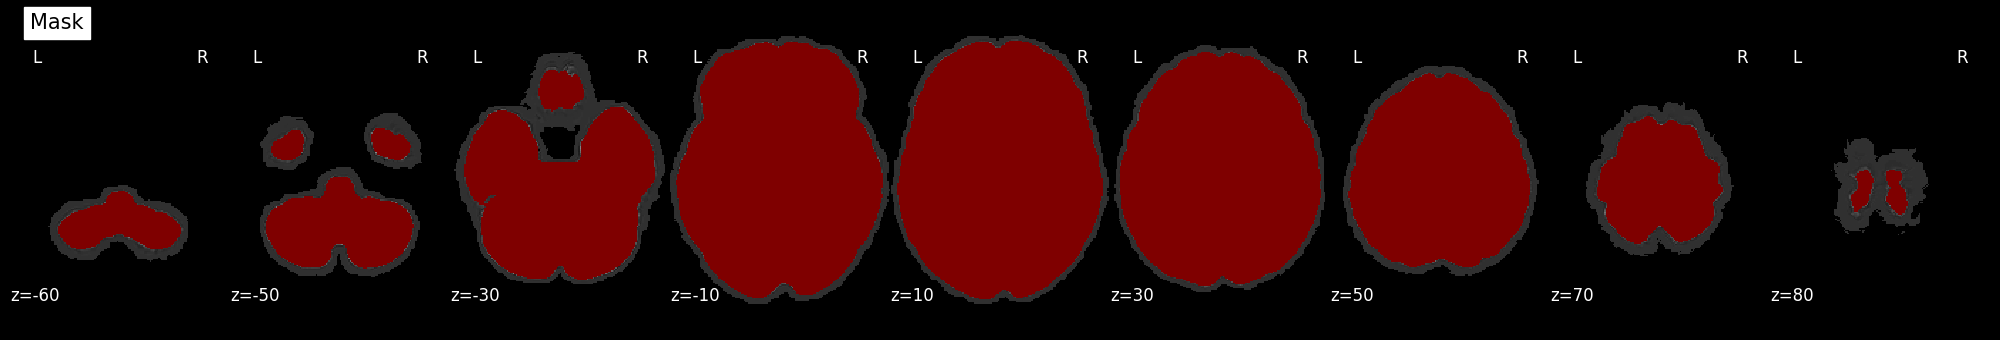

In [4]:
mask_wb_filename='../InSpePosNegData/BIDS_2023E/derivatives/sub-0118/anat/sub-0118_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
anat_filename='../InSpePosNegData/BIDS_2023E/derivatives/sub-0118/anat/sub-0118_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
#Load the whole brain mask
mask_img = load_img(mask_wb_filename)

## This bit can be used if you want to make a smaller select of the brain to study (e.g. to speed up analsysis)
process_mask = mask_img.get_fdata().astype(int)
#Set slices below x in the z-dimension to zero (in voxel space)
process_mask[..., :10] = 0
#Set slices above x in the z-dimension to zero (in voxel space)
process_mask[..., 170:] = 0
process_mask_img = new_img_like(mask_img, process_mask)


#Plot the mask on an anatomical background
#plot_img(process_mask_img, bg_img=anat_filename,#bg_img=mean_fmri,
         #title="Mask", display_mode="z",cut_coords=[-60,-50,-30,-10,10,30,50,70,80],
         #vmin=.40, cmap='jet', threshold=0.9, black_bg=True)


In [ ]:
# The radius is the one of the Searchlight sphere that will scan the volume
searchlight = SearchLight(
    mask_img,
    estimator=GaussianNB(),
    process_mask_img=process_mask_img,
    radius=5, n_jobs=-1,
    verbose=10, cv=10)
searchlight.fit(fmri_img_train, conditions_train)

In [ ]:
# Saving the objects:
f = open('../data/searchlight.pkl', 'wb')
pickle.dump([searchlight, searchlight.scores_], f)
f.close()